import the necessary libraries. We'll need numpy for numerical operations (especially sqrt) and matplotlib.pyplot for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

Defining Parameters
We need to define all the physical constants and projectile properties.

In [2]:
# --- Environmental Parameters ---
rho = 1.225  # Density of air at sea level (kg/m^3)
g = 9.81     # Acceleration due to gravity (m/s^2)

# --- Projectile Parameters ---
m = 0.15     # Mass of projectile (e.g., a baseball) (kg)
r = 0.0366   # Radius of projectile (e.g., a baseball, approx 73.2 mm diameter / 2) (m)
A = np.pi * r**2 # Cross-sectional area (m^2)
Cd = 0.47    # Drag coefficient for a sphere (dimensionless)

# Let's combine some terms for convenience to reduce repeated calculations
# The constant 'k' represents (1/2) * rho * Cd * A
k = 0.5 * rho * Cd * A

print(f"Calculated k (drag constant): {k:.6f} kg/m")

Calculated k (drag constant): 0.001211 kg/m


initial Conditions specify the initial launch conditions: initial speed and launch angle.

In [3]:
# --- Initial Conditions ---
v0 = 50.0    # Initial launch speed (m/s)
theta_deg = 45 # Launch angle in degrees
theta_rad = np.deg2rad(theta_deg) # Convert angle to radians for trigonometric functions

# Initial velocity components
vx0 = v0 * np.cos(theta_rad)
vy0 = v0 * np.sin(theta_rad)

# Initial position
x0 = 0.0
y0 = 0.0

print(f"Initial horizontal velocity (vx0): {vx0:.2f} m/s")
print(f"Initial vertical velocity (vy0): {vy0:.2f} m/s")

Initial horizontal velocity (vx0): 35.36 m/s
Initial vertical velocity (vy0): 35.36 m/s


The Simulation Loop
This is the core of our numerical integration. We'll set a time step dt and iterate, updating position and velocity at each step until the projectile hits the ground (y <= 0)

In [4]:
# --- Simulation Parameters ---
dt = 0.01    # Time step (seconds) - smaller dt means more accuracy but longer computation
t_max = 20.0 # Maximum simulation time (seconds) - a safeguard to prevent infinite loops

# --- Data Storage ---
# We'll store the x and y coordinates at each time step to plot the trajectory
time_points = [0.0]
x_points = [x0]
y_points = [y0]
vx_points = [vx0]
vy_points = [vy0]

# Initialize current state variables
current_x = x0
current_y = y0
current_vx = vx0
current_vy = vy0
current_time = 0.0

# --- Simulation Loop ---
print("\nStarting simulation...")
while current_y >= 0 and current_time <= t_max:
    # 1. Calculate the magnitude of the current velocity
    v_magnitude = np.sqrt(current_vx**2 + current_vy**2)

    # 2. Calculate drag force components (proportional to -k * v_magnitude * v_component)
    # The 'k' term already includes 0.5 * rho * Cd * A
    F_drag_x = -k * v_magnitude * current_vx
    F_drag_y = -k * v_magnitude * current_vy

    # 3. Calculate accelerations (a = F/m)
    ax = F_drag_x / m
    ay = (F_drag_y - m * g) / m # Remember gravity is always downwards (-mg)

    # 4. Update velocities using Euler method
    current_vx = current_vx + ax * dt
    current_vy = current_vy + ay * dt

    # 5. Update positions using Euler method
    current_x = current_x + current_vx * dt
    current_y = current_y + current_vy * dt

    # 6. Update time
    current_time += dt

    # 7. Store the data for plotting
    time_points.append(current_time)
    x_points.append(current_x)
    y_points.append(current_y)
    vx_points.append(current_vx)
    vy_points.append(current_vy)

print("Simulation finished.")
print(f"Final Range (with air resistance): {x_points[-1]:.2f} meters")
print(f"Max Height (with air resistance): {max(y_points):.2f} meters")
print(f"Total Time of Flight (with air resistance): {time_points[-1]:.2f} seconds")


Starting simulation...
Simulation finished.
Final Range (with air resistance): 108.59 meters
Max Height (with air resistance): 37.33 meters
Total Time of Flight (with air resistance): 5.48 seconds


Ideal Projectile Motion Calculations (for comparison)
Let's quickly calculate the ideal trajectory using standard kinematic equations.

In [5]:
# --- Ideal Projectile Motion (No Air Resistance) ---
# Time of flight: t_ideal = 2 * v_y0 / g
t_flight_ideal = 2 * vy0 / g
print(f"\nIdeal Time of Flight: {t_flight_ideal:.2f} seconds")

# Max height: H_ideal = (v_y0^2) / (2 * g)
h_max_ideal = (vy0**2) / (2 * g)
print(f"Ideal Max Height: {h_max_ideal:.2f} meters")

# Range: R_ideal = v_x0 * t_flight_ideal
range_ideal = vx0 * t_flight_ideal
print(f"Ideal Range: {range_ideal:.2f} meters")

# Generate points for ideal trajectory for plotting
t_ideal_points = np.linspace(0, t_flight_ideal, 100)
x_ideal_points = vx0 * t_ideal_points
y_ideal_points = vy0 * t_ideal_points - 0.5 * g * t_ideal_points**2


Ideal Time of Flight: 7.21 seconds
Ideal Max Height: 63.71 meters
Ideal Range: 254.84 meters


Plotting Trajectories

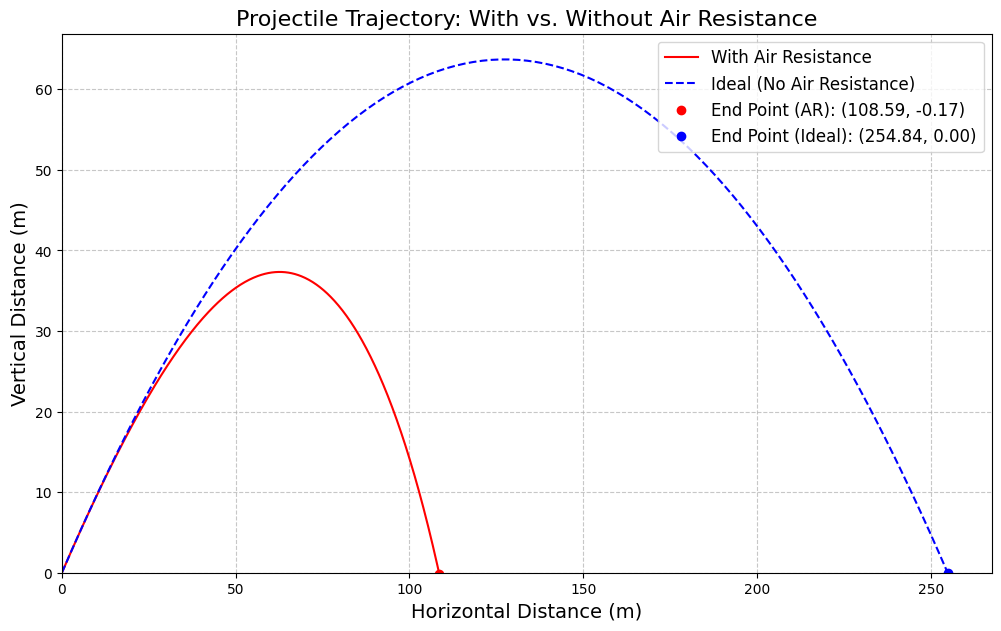

In [6]:
plt.figure(figsize=(12, 7))
plt.plot(x_points, y_points, 'r-', label='With Air Resistance')
plt.plot(x_ideal_points, y_ideal_points, 'b--', label='Ideal (No Air Resistance)')

plt.title('Projectile Trajectory: With vs. Without Air Resistance', fontsize=16)
plt.xlabel('Horizontal Distance (m)', fontsize=14)
plt.ylabel('Vertical Distance (m)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5) # Ground line

# Add labels for key points (optional, but good for understanding)
plt.plot(x_points[-1], y_points[-1], 'ro', markersize=6, label=f'End Point (AR): ({x_points[-1]:.2f}, {y_points[-1]:.2f})')
plt.plot(range_ideal, 0, 'bo', markersize=6, label=f'End Point (Ideal): ({range_ideal:.2f}, 0.00)')


plt.legend(fontsize=12)
plt.ylim(bottom=0) # Ensure y-axis starts at 0 for ground
plt.xlim(left=0)  # Ensure x-axis starts at 0
plt.show()